In [101]:
import torch
from discriminator import Discriminator
from generator import Generator
from pathlib import Path
import numpy as np
import matplotlib.pyplot as plt
import pickle
from torch.utils.tensorboard import SummaryWriter

In [34]:
checkpoint_path = Path("data/3l/checkpoint.pth")
generator = Generator().to('cuda')
checkpoint = torch.load(checkpoint_path)
generator.load_state_dict(checkpoint["generator_state_dict"])

<All keys matched successfully>

In [35]:
_ = generator.eval()

In [7]:
writer = SummaryWriter('runs/3layers_gan_mnist')

In [8]:
writer.add_graph(generator, torch.randn(1, 100, device="cuda"))

In [42]:
np.random.seed(0)
points = torch.tensor(np.random.randn(100,100).astype(np.float32), device="cuda")

In [53]:
with torch.no_grad():
    images = generator(points).cpu().numpy().squeeze(1)

In [58]:
def display_images(images):
    fig = plt.figure()
    w = int(np.sqrt(len(images)))
    h = (len(images) + w - 1) // w
    for i, im in enumerate(images):
        plt.subplot(h, w, 1 + i)
        plt.axis('off')
        plt.imshow(im, cmap='gray_r')
    fig.set_size_inches(15, 15)
    plt.show()


In [99]:
def display_images_row(images):
    fig = plt.figure()
    w = len(images)
    h = 1
    for i, im in enumerate(images):
        plt.subplot(h, w, 1 + i)
        plt.axis('off')
        plt.imshow(im, cmap='gray_r')
    fig.set_size_inches(15, 5)
    plt.show()

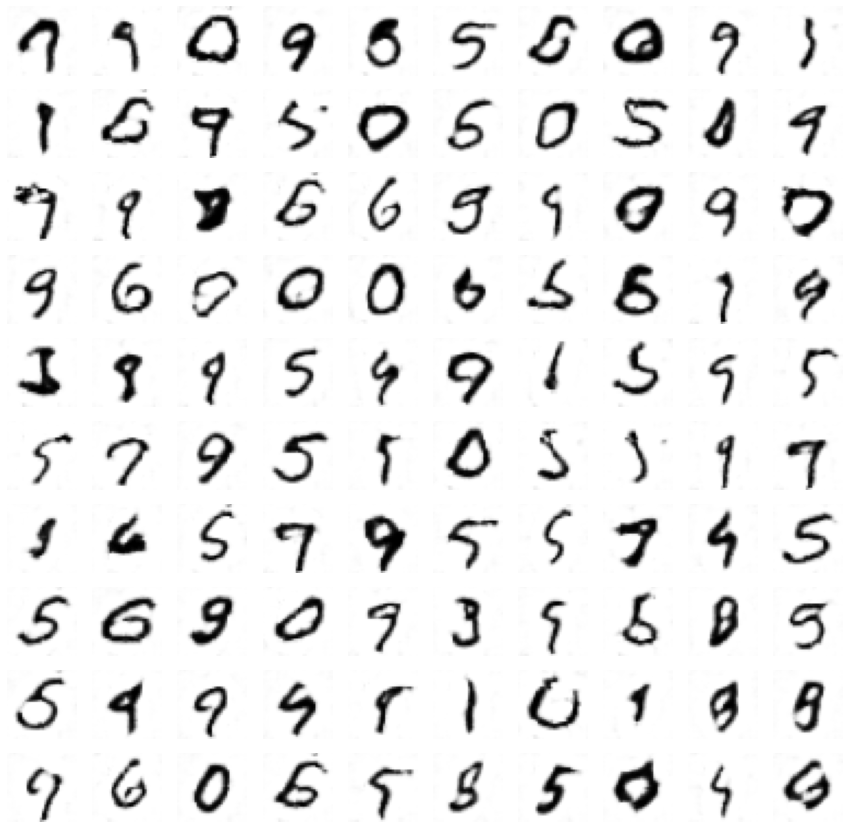

In [59]:
display_images(images)

In [91]:
zero = points[31]
nine = points[3]

In [96]:
interpolated = zero+((nine-zero).reshape(1, -1)*torch.linspace(0, 1, 10, device="cuda").reshape(-1, 1))

In [97]:
with torch.no_grad():
    images_inter = generator(interpolated).cpu().numpy().squeeze(1)

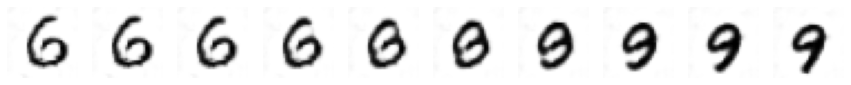

In [100]:
display_images_row(images_inter)

In [102]:
logs = pickle.load(open("data/3l/logs", "rb"))

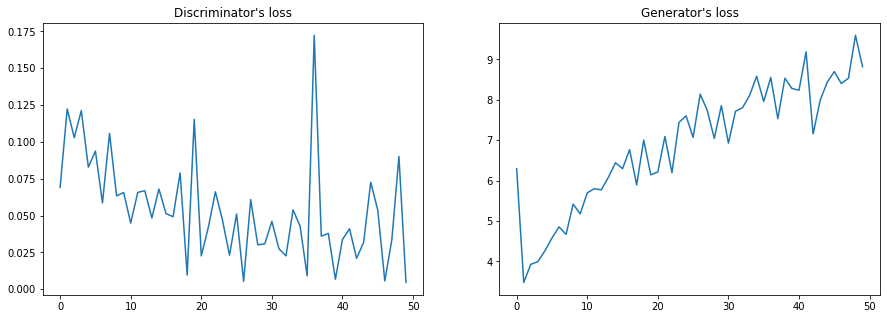

In [124]:
fig, ax = plt.subplots(1, 2)
dloss = [np.mean(log["d_loss"]) for log in logs]
ax[0].plot(range(len(dloss)), dloss)
ax[0].set_title("Discriminator's loss")

gloss = [np.mean(log["g_loss"]) for log in logs]
ax[1].plot(range(len(gloss)), gloss)
ax[1].set_title("Generator's loss")
fig.set_size_inches(15, 5)

In [133]:
import glob

In [134]:
ims = glob.glob("data/3l/gif/*.png")

In [137]:
import cv2

In [164]:
for p in ims:
    im = cv2.imread(p)
    i = int(p.split("/")[-1].split("_")[0])+1
    font = cv2.FONT_HERSHEY_SIMPLEX
    cv2.putText(im, f'Epoch {i}',(20,40), font, 1, (0,0,0), 2, cv2.LINE_AA)
    cv2.imwrite(f"out/{i:02}.png", im)

'10'